In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [4]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, train_loader, criterion, optimizer, epochs):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}")
    return train_losses

def test(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    test_losses = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_losses.append(loss.item())
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy, test_losses

In [5]:
num_epochs = 5
train_losses = train(model, train_loader, criterion, optimizer, epochs=num_epochs)
test_accuracy, test_losses = test(model, test_loader)

Epoch [1/5], Loss: 0.1538
Epoch [2/5], Loss: 0.0457
Epoch [3/5], Loss: 0.0302
Epoch [4/5], Loss: 0.0226
Epoch [5/5], Loss: 0.0180
Test Accuracy: 99.12%


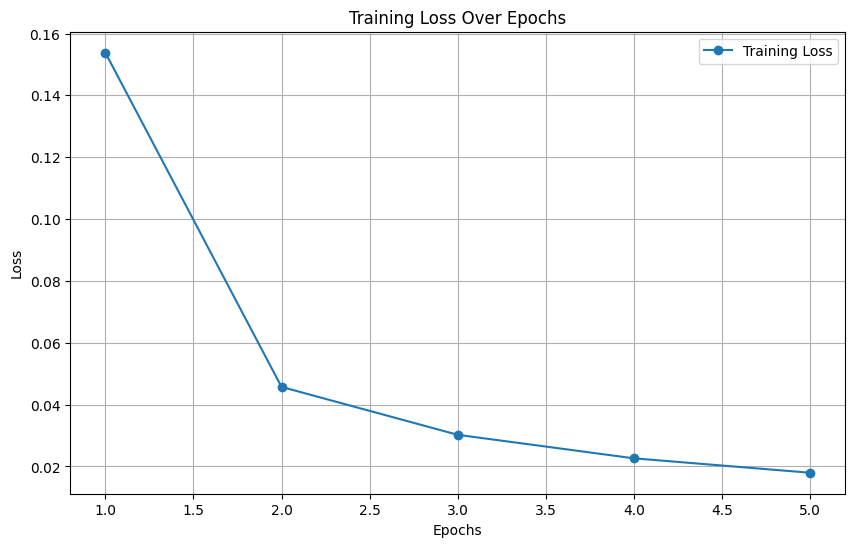

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

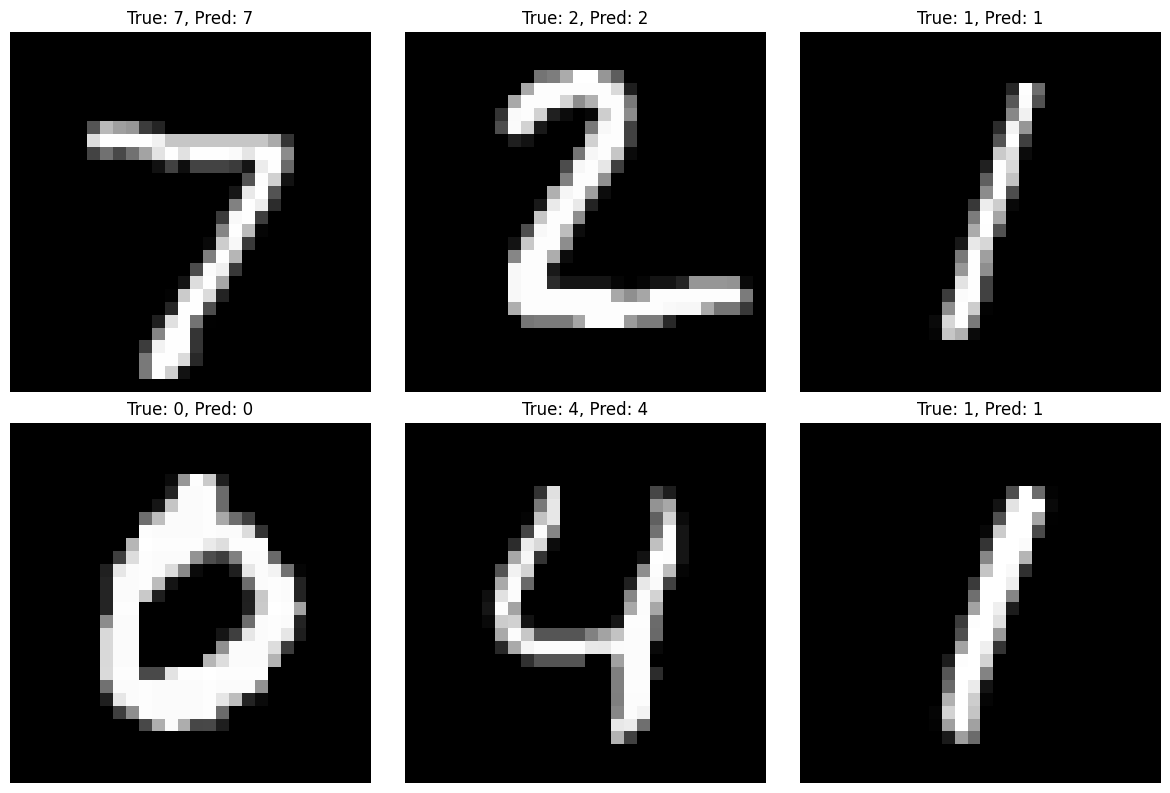

In [7]:
model.eval()
dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

plt.figure(figsize=(12, 8))
for idx in range(6):
    plt.subplot(2, 3, idx + 1)
    plt.imshow(images[idx].squeeze(), cmap='gray')
    plt.title(f'True: {labels[idx]}, Pred: {predicted[idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

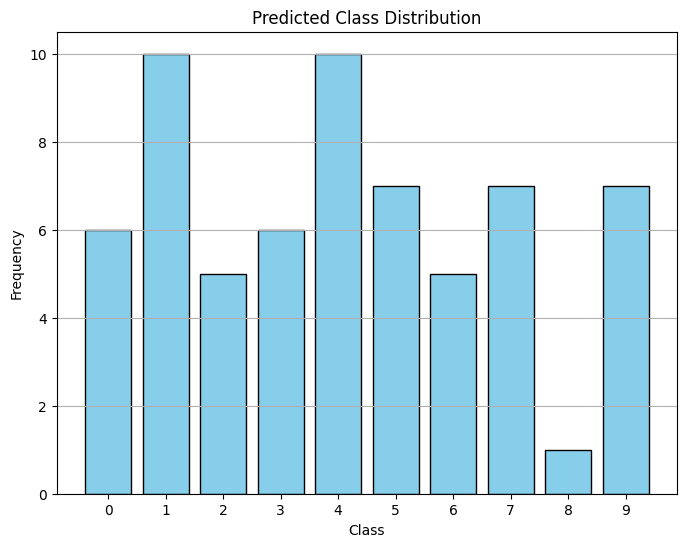

In [8]:
plt.figure(figsize=(8, 6))
predicted_classes = predicted.numpy()
plt.hist(predicted_classes, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(10))
plt.title('Predicted Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()